# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
# Connecting with database
conn=sqlite3.connect('inventory.db')

# Fetching vendor summary data
df=pd.read_sql_query("Select * from Vendor_Analysis_Summary",conn)
df.to_csv("Vendor_Analysis_Summary.csv", index=False)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnOver,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,43772.0,1569287.28,178984.60,80426.87,68601.68,-2241964.32,-142.865130,0.301709,0.411751
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,47449.0,1418645.51,150109.41,87183.24,144929.24,-2385395.71,-168.146002,0.289256,0.372931
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,50762.0,1220613.88,120364.11,93270.99,123780.22,-2197689.80,-180.047912,0.270865,0.357082
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,78739.0,1701015.61,113482.83,144678.82,257032.07,-1560182.33,-91.720636,0.390412,0.521592
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,42736.0,1313126.64,148208.14,78523.47,257032.07,-1710079.37,-130.229585,0.309437,0.434349


# Exploratory Data Analysis


--Previously, we examined the various tables in the database to identify key variables, understand their relationships, and determine which ones should be included in the final analysis.

--In this phase of EDA, we will analyze the resultant table to gain insights into the distribution of each column. This will help us understand data patterns, identify anomalies, and ensure data quality before proceeding with further analysis.

In [3]:
# Summary Statistics

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,9.554076e+02,3405.289491,0.00,7.000000,63.500000,573.000000,9.510500e+04
TotalSalesDollars,10692.0,1.327569e+04,53892.625064,0.00,143.920000,1253.145000,8878.787500,1.701016e+06
TotalSalesPrice,10692.0,5.673471e+03,13100.009029,0.00,70.717500,739.880000,5031.592500,1.789846e+05


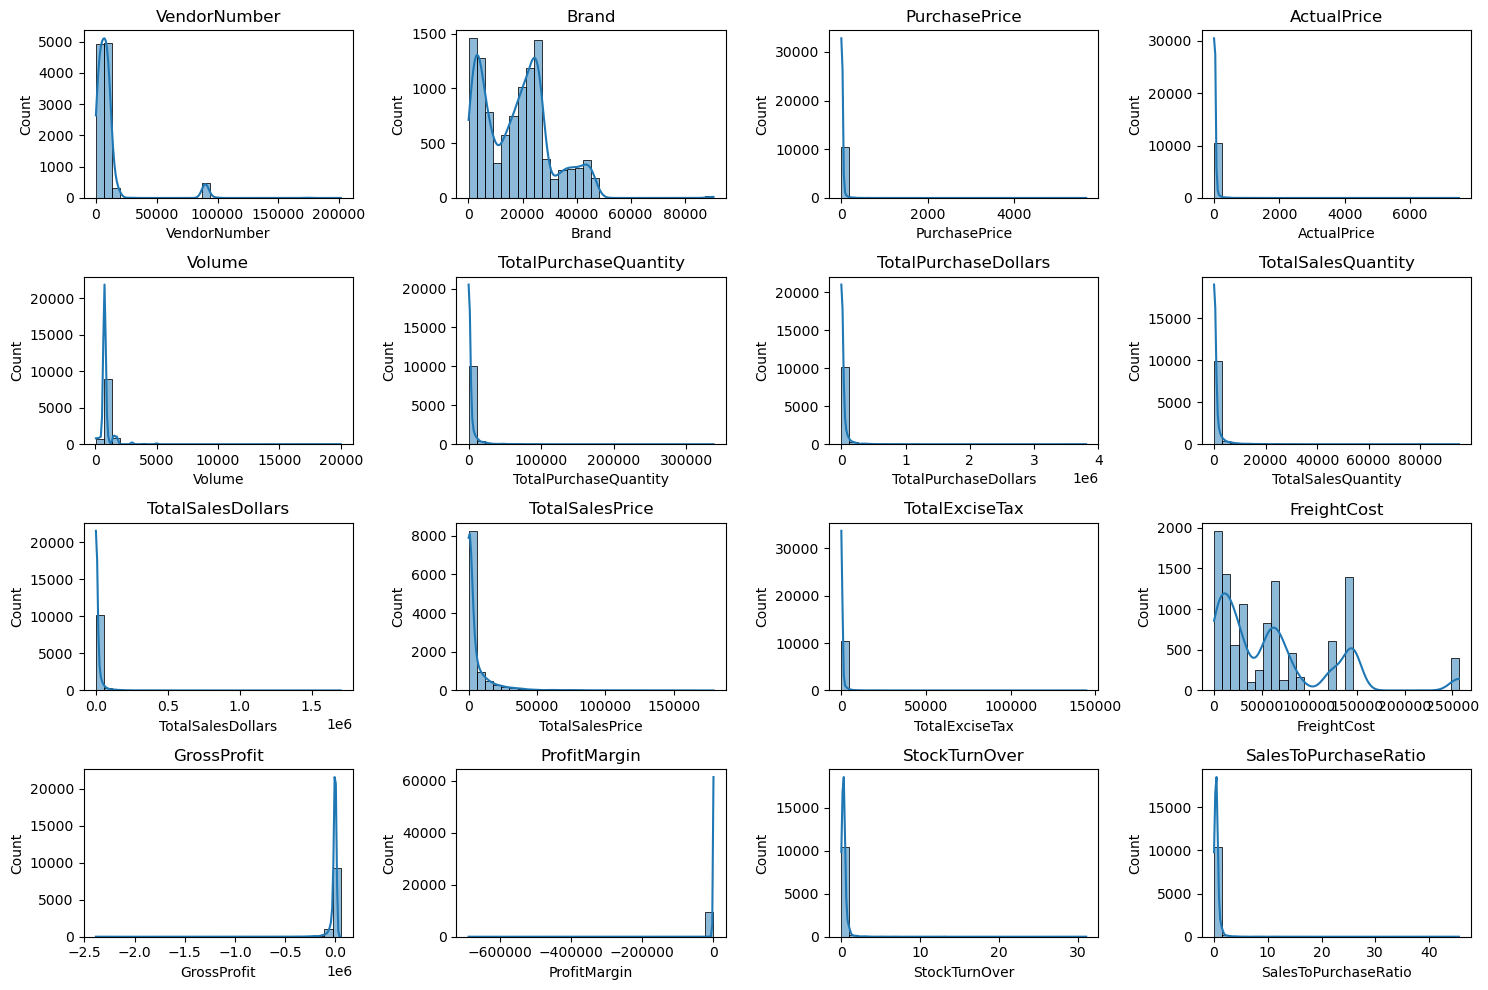

In [4]:
# Distribution Plots for Numerical Columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1) # Adjust grid layout as needed
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()

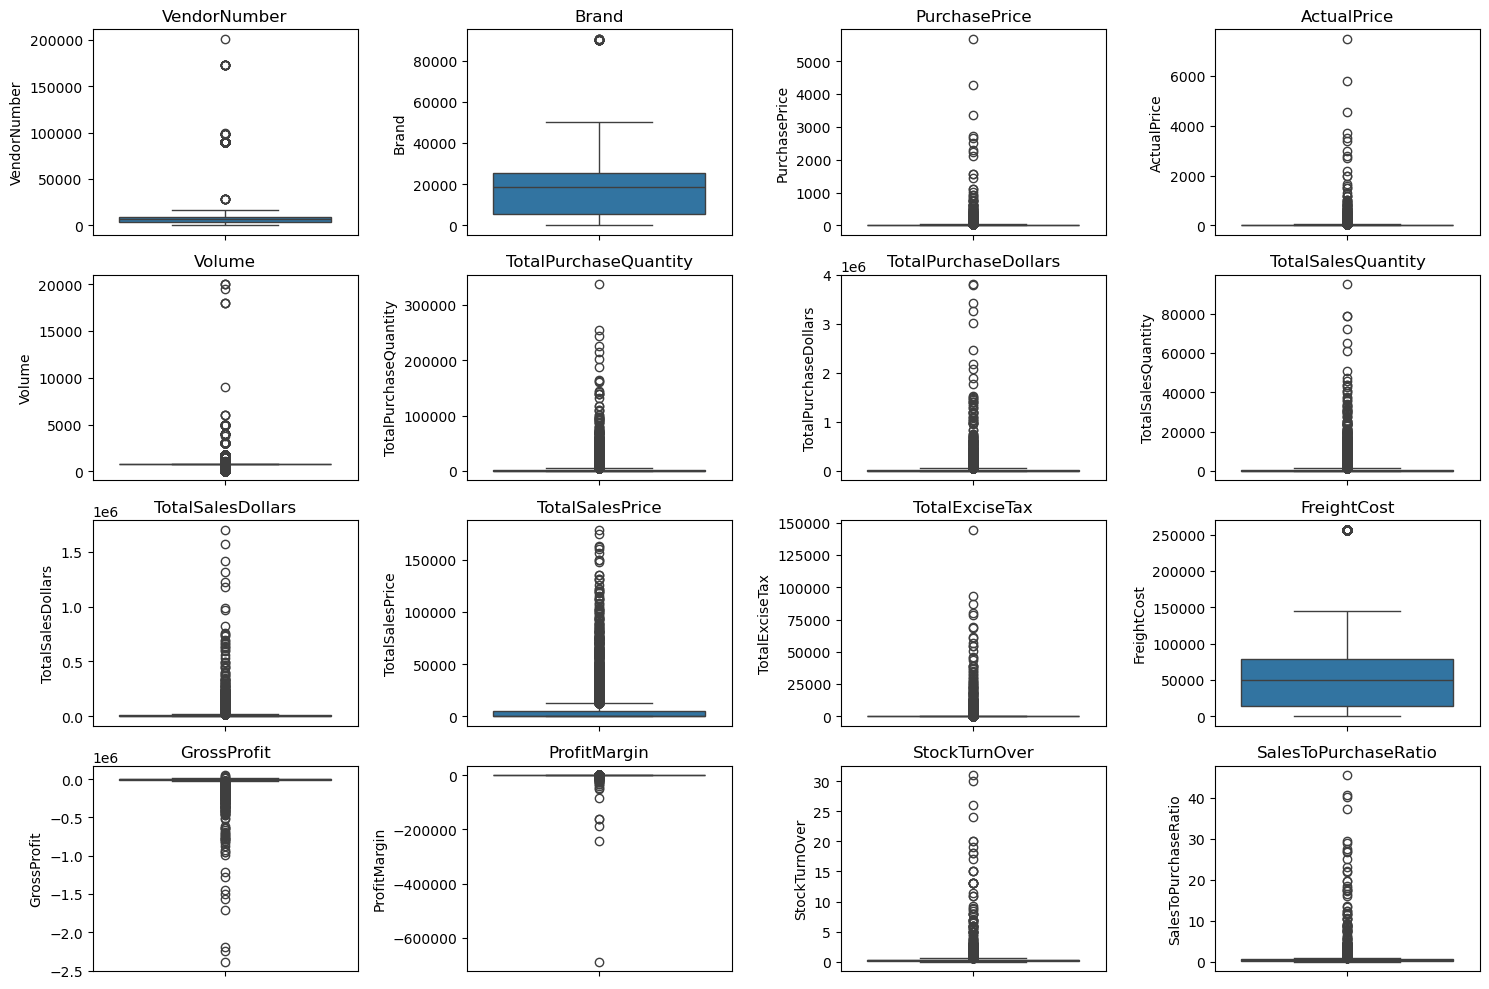

In [5]:
# Distribution Plots for Numerical Columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1) # Adjust grid layout as needed
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

## Summary Statistics Insights

#### Negative & Zero Values:

- **Gross Profit:** Minimum value is **-2385395.71**, indicating losses. Some products or transactions may be selling at a loss due to high costs or selling at discounts lower than the purchase price.  
- **Profit Margin:** Has a minimum of **−∞**, which suggests cases where **revenue is zero or even lower than costs**.  
- **Total Sales Quantity & Sales Dollars:** Minimum values are **0**, meaning some products were purchased but never sold. These could be **slow-moving or obsolete stock**.  

---

#### Outliers Indicated by High Standard Deviations:

- **Purchase & Actual Prices:** The max values (**5,681.81** & **7,499.99**) are significantly higher than the mean (**24.39** & **35.64**), indicating **potential premium products**.  
- **Freight Cost:** Huge variation, from **0.09 to 257,032.07**, suggests **logistics inefficiencies or bulk shipments**.  
- **Stock Turnover:** Ranges from **0 to 310**, implying some products sell **extremely fast while others remain in stock indefinitely**.  
  - A value **greater than 1** indicates that sold quantity for that product is higher than purchased quantity — possibly because **sales are being fulfilled from older stock**.


In [6]:
# let's filter out the data by emoving inconsistancies

df=pd.read_sql_query("""Select * from Vendor_Analysis_Summary where 
GrossProfit >0 and
ProfitMargin >0 and
TotalSalesQuantity>0""",conn)
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnOver,SalesToPurchaseRatio
0,3960,DIAGEO NORTH AMERICA INC,1003,Crown Royal +2 Reusable Cups,16.66,25.99,750.0,11973,199470.18,9283.0,213420.17,61893.08,7308.78,257032.07,13949.99,6.536397,0.775328,1.069935
1,3960,DIAGEO NORTH AMERICA INC,381,Baileys Irish Cream w/4 Glss,14.50,21.99,750.0,12796,185542.00,11913.0,238146.87,50316.83,9380.06,257032.07,52604.87,22.089255,0.930994,1.283520
2,1128,BROWN-FORMAN CORP,1244,Jack Daniels Winter Jack,12.79,17.99,750.0,8197,104839.63,6876.0,109949.24,35004.11,5413.46,68601.68,5109.61,4.647244,0.838843,1.048737
3,480,BACARDI USA INC,1330,Grey Goose Glass Pack,38.27,49.99,1750.0,2403,91962.81,2249.0,112435.51,47848.43,4132.81,89286.27,20472.70,18.208393,0.935913,1.222619
4,4425,MARTIGNETTI COMPANIES,26181,Jaume Serra Cristalino Brut,4.57,8.99,750.0,17848,81565.36,10086.0,81589.70,17215.40,1131.27,144929.24,24.34,0.029832,0.565105,1.000298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,516,BANFI PRODUCTS CORP,17172,Riunite Sweet White,4.10,5.99,750.0,1,4.10,1.0,5.99,5.99,0.11,8510.41,1.89,31.552588,1.000000,1.460976
817,3960,DIAGEO NORTH AMERICA INC,2626,Crown Royal Apple,1.42,1.99,50.0,2,2.84,2.0,3.98,3.98,0.10,257032.07,1.14,28.643216,1.000000,1.401408
818,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,6.0,2.94,0.49,0.32,50293.62,0.60,20.408163,1.000000,1.256410
819,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838


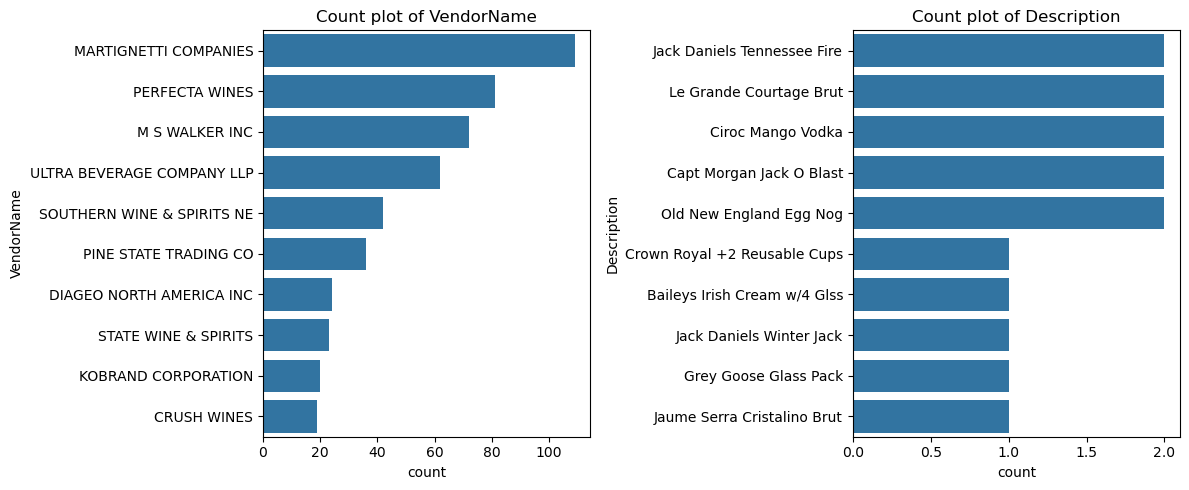

In [7]:
# Count plots of categorical Columns
categorical_cols = ["VendorName","Description"]

plt.figure(figsize=(12, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i+1) # Adjust grid layout as needed
    sns.countplot(y=df[col],order=df[col].value_counts().index[:10]) #Top 10 ategpries
    plt.title(f"Count plot of {col}")

plt.tight_layout()
plt.show()

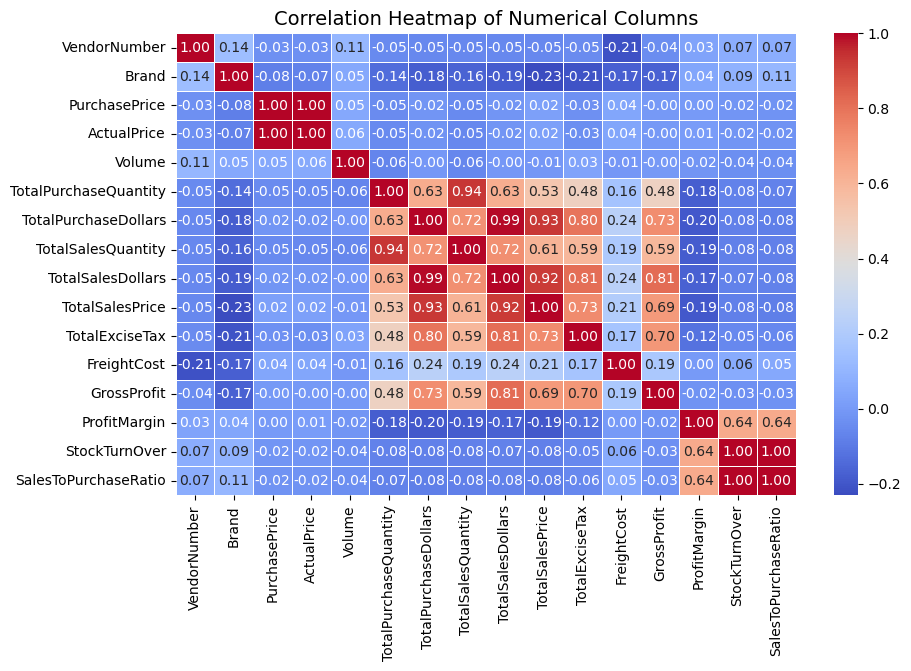

In [8]:
# Correlation Heatmap

# Compute correlation matrix
corr_matrix = df.select_dtypes(include=np.number).corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title
plt.title('Correlation Heatmap of Numerical Columns', fontsize=14)

# Display the heatmap
plt.show()

# Correlation Insights

--PurchasePrice shows very weak correlations with both TotalSalesDollars (0.02) and GrossProfit (0.04), indicating that variations in purchase price have little impact on overall sales revenue or profitability.

--TotalPurchaseQuantity and TotalSalesQuantity have an extremely strong positive correlation (0.94), suggesting efficient inventory movement and close alignment between purchases and sales.

--ProfitMargin and TotalSalesPrice have a moderate positive correlation (0.69) — unlike the earlier negative trend — implying that higher sales prices may be contributing to better margins.

--StockTurnOver has a moderate positive correlation with both GrossProfit (0.64) and ProfitMargin (0.64), indicating that faster stock movement is generally associated with improved profitability.

# Data Analysis

#### Identify Brands that's need promotional and pricing adjustment which exibits lower sales performance but higher profit margin

In [9]:
brand_performance=df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin':'mean'}).reset_index()

In [10]:
low_sales_threshold=brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_thresold=brand_performance['ProfitMargin'].quantile(0.85)

In [11]:
print(low_sales_threshold)

138.43


In [12]:
print(high_margin_thresold)

64.49282739972654


In [13]:
# Filter bands with low sales but high profit

target_brands=brand_performance[(brand_performance['TotalSalesDollars'] <=low_sales_threshold)&
(brand_performance['ProfitMargin'] <=high_margin_thresold)]

print("Brands with low sales but high profit margins :")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with low sales but high profit margins :


,Description,TotalSalesDollars,ProfitMargin
261,Deep Eddy Vodka,1.98,25.252525
279,Dr McGillicuddy's Apple Pie,2.94,20.408163
241,Crown Royal Apple,3.98,28.643216
617,Riunite Sweet White,5.99,31.552588
167,Ch Maycott Red,10.49,35.081030
...,...,...,...
201,Chateau Carlmagnus 10,134.95,21.037421
407,Jadot Beaune Bressandes 12,134.97,34.207602
82,C K Mondavi Wh Znfdl,135.83,29.853493
433,Julius Treis Trocken Rsl,137.94,35.058721


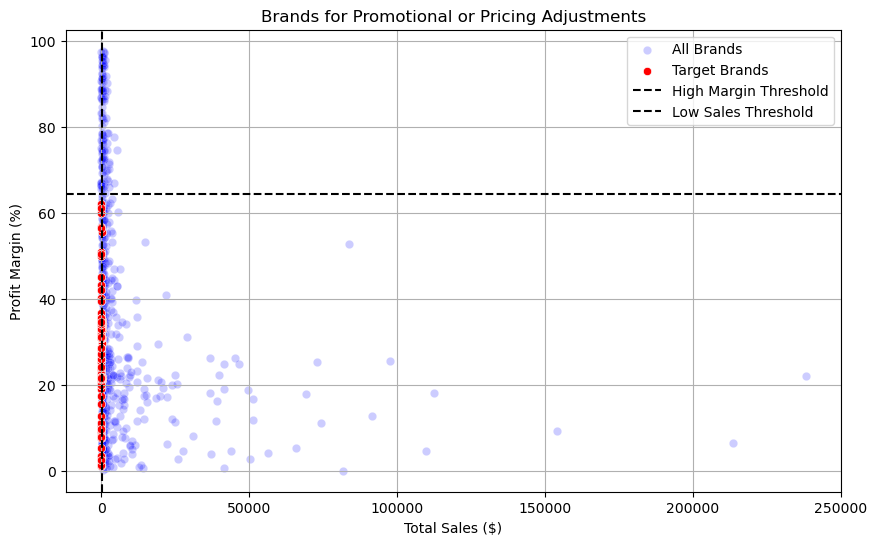

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargin', color="blue", label="All Brands", alpha = 0.2)
sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin', color="red", label="Target Brands")

plt.axhline(high_margin_thresold, linestyle='--', color='black', label='High Margin Threshold')
plt.axvline(low_sales_threshold, linestyle='--', color='black', label='Low Sales Threshold')

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.grid(True)
plt.legend()
plt.show()


### Which vendors and brands demonstrate the hidhest sales performance ?

In [23]:
def format_dollars(x):
    """
    Format a number as dollars with K/M suffixes.
    Example: 1250 -> $1.25K, 2500000 -> $2.50M
    """
    if x >= 1_000_000:
        return f"${x/1_000_000:,.2f}M"
    elif x >= 1_000:
        return f"${x/1_000:,.2f}K"
    else:
        return f"${x:,.2f}"


In [24]:
# Top vendors and brands by sales performance

top_vendors= df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands= df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)
top_vendors

VendorName
DIAGEO NORTH AMERICA INC    813486.44
MARTIGNETTI COMPANIES       422125.38
BROWN-FORMAN CORP           263000.87
PERNOD RICARD USA           236747.48
PERFECTA WINES              211830.66
MOET HENNESSY USA INC       197531.99
M S WALKER INC              160683.00
PINE STATE TRADING CO       148164.09
JIM BEAM BRANDS COMPANY     129940.65
BACARDI USA INC             127407.96
Name: TotalSalesDollars, dtype: float64

In [25]:
top_brands

Description
Baileys Irish Cream w/4 Glss    238146.87
Crown Royal +2 Reusable Cups    213420.17
Ciroc Mango Vodka               154020.72
Grey Goose Glass Pack           112435.51
Jack Daniels Winter Jack        109949.24
Hard Rock Vodka                  97489.95
Kahlua w/50mL Absolut+Glass      91686.72
Duboeuf Bjls Nouveau 2014        83655.88
Jaume Serra Cristalino Brut      81589.70
Capt Morgan Jack O Blast         74189.51
Name: TotalSalesDollars, dtype: float64

In [26]:
top_brands.apply(lambda x: format_dollars(x))

Description
Baileys Irish Cream w/4 Glss    $238.15K
Crown Royal +2 Reusable Cups    $213.42K
Ciroc Mango Vodka               $154.02K
Grey Goose Glass Pack           $112.44K
Jack Daniels Winter Jack        $109.95K
Hard Rock Vodka                  $97.49K
Kahlua w/50mL Absolut+Glass      $91.69K
Duboeuf Bjls Nouveau 2014        $83.66K
Jaume Serra Cristalino Brut      $81.59K
Capt Morgan Jack O Blast         $74.19K
Name: TotalSalesDollars, dtype: object

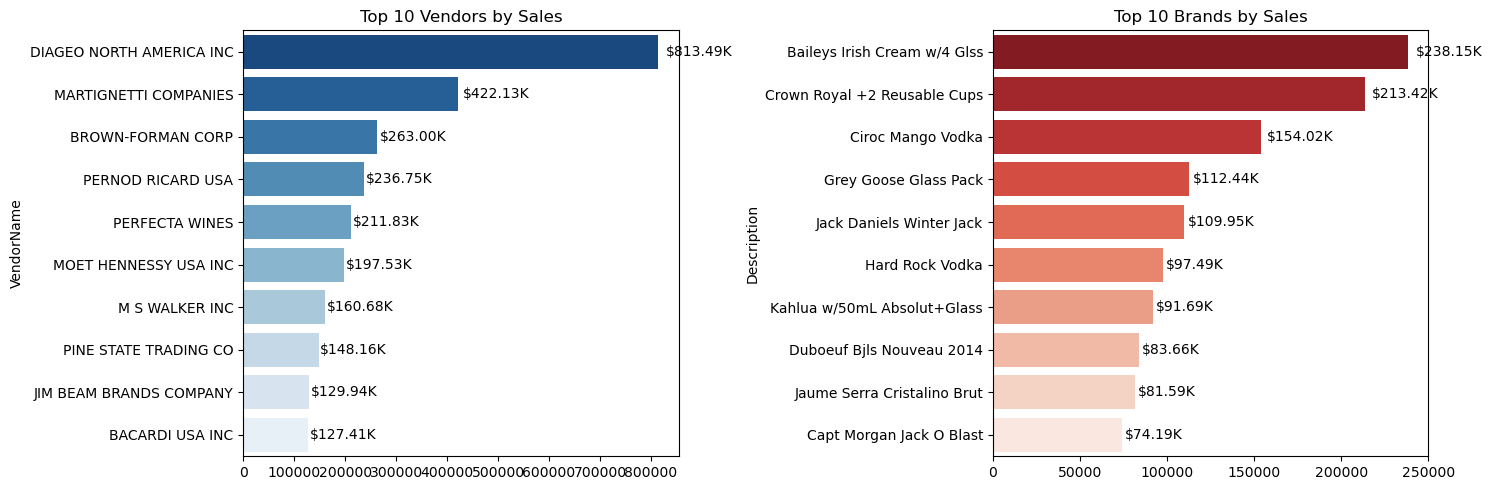

In [27]:
plt.figure(figsize=(15, 5))

# Plot for Top Vendors
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

# Plot for Top Brands
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()


## Which vendors contributes the most to the total purchase dollars

In [29]:
vendor_performance=df.groupby("VendorName").agg({
                              'TotalPurchaseDollars':'sum' ,
                              'GrossProfit':'sum' ,
                              'TotalSalesDollars':'sum'}).reset_index()

In [30]:
vendor_performance['Purchase_Contribution%']=vendor_performance['TotalSalesDollars']/vendor_performance['TotalSalesDollars'].sum()*100

In [31]:
vendor_performance

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,Purchase_Contribution%
0,ALISA CARR BEVERAGES,9355.56,6635.38,15990.94,0.419125
1,ATLANTIC IMPORTING COMPANY,641.08,78.68,719.76,0.018865
2,BACARDI USA INC,100237.60,27170.36,127407.96,3.339383
3,BANFI PRODUCTS CORP,42384.72,722.64,43107.36,1.129851
4,BROWN-FORMAN CORP,233201.99,29798.88,263000.87,6.893294
...,...,...,...,...,...
74,VINILANDIA USA,2701.33,1207.62,3908.95,0.102454
75,VRANKEN AMERICA,2257.19,292.12,2549.31,0.066818
76,WEIN BAUER INC,3436.64,1603.15,5039.79,0.132094
77,WILLIAM GRANT & SONS INC,26825.83,2466.44,29292.27,0.767755


In [32]:
vendor_performance=round(vendor_performance.sort_values('Purchase_Contribution%',ascending=False,),2)
vendor_performance.shape

(79, 5)

In [33]:
#Display Top 10 Vendors

top_vendors=vendor_performance.head(10)
top_vendors['TotalSalesDollars']=top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars']=top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit']=top_vendors['GrossProfit'].apply(format_dollars)
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,Purchase_Contribution%
14,DIAGEO NORTH AMERICA INC,$700.56K,$112.93K,$813.49K,21.32
35,MARTIGNETTI COMPANIES,$321.58K,$100.55K,$422.13K,11.06
4,BROWN-FORMAN CORP,$233.20K,$29.80K,$263.00K,6.89
45,PERNOD RICARD USA,$195.40K,$41.35K,$236.75K,6.21
44,PERFECTA WINES,$163.82K,$48.01K,$211.83K,5.55
39,MOET HENNESSY USA INC,$163.82K,$33.72K,$197.53K,5.18
33,M S WALKER INC,$115.12K,$45.56K,$160.68K,4.21
47,PINE STATE TRADING CO,$109.04K,$39.12K,$148.16K,3.88
27,JIM BEAM BRANDS COMPANY,$100.11K,$29.83K,$129.94K,3.41
2,BACARDI USA INC,$100.24K,$27.17K,$127.41K,3.34


In [34]:
print(top_vendors['Purchase_Contribution%'].sum())

71.05000000000001


In [35]:
top_vendors['Cumulative_Contribution%']=top_vendors['Purchase_Contribution%'].cumsum()

In [36]:
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,Purchase_Contribution%,Cumulative_Contribution%
14,DIAGEO NORTH AMERICA INC,$700.56K,$112.93K,$813.49K,21.32,21.32
35,MARTIGNETTI COMPANIES,$321.58K,$100.55K,$422.13K,11.06,32.38
4,BROWN-FORMAN CORP,$233.20K,$29.80K,$263.00K,6.89,39.27
45,PERNOD RICARD USA,$195.40K,$41.35K,$236.75K,6.21,45.48
44,PERFECTA WINES,$163.82K,$48.01K,$211.83K,5.55,51.03
39,MOET HENNESSY USA INC,$163.82K,$33.72K,$197.53K,5.18,56.21
33,M S WALKER INC,$115.12K,$45.56K,$160.68K,4.21,60.42
47,PINE STATE TRADING CO,$109.04K,$39.12K,$148.16K,3.88,64.30
27,JIM BEAM BRANDS COMPANY,$100.11K,$29.83K,$129.94K,3.41,67.71
2,BACARDI USA INC,$100.24K,$27.17K,$127.41K,3.34,71.05


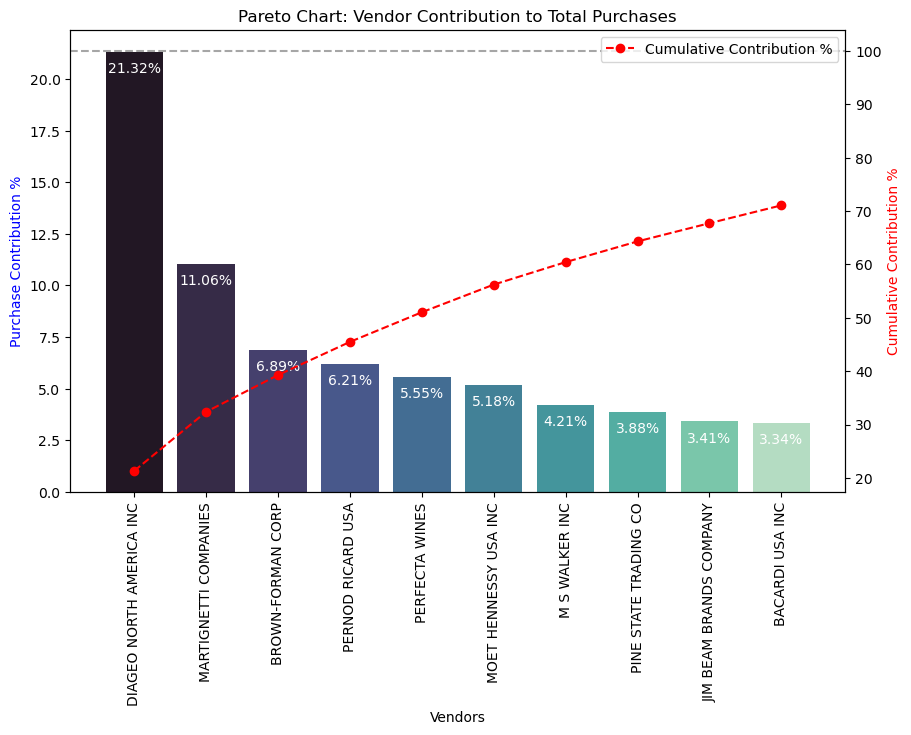

In [37]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Purchase Contribution%
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['Purchase_Contribution%'], palette="mako", ax=ax1)

for i, value in enumerate(top_vendors['Purchase_Contribution%']):
    ax1.text(i, value - 1, str(value) + '%', ha='center', fontsize=10, color='white')

# Line Plot for Cumulative Contribution%
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_Contribution%'], color='red', marker='o', linestyle='dashed', label='Cumulative Contribution %')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.show()



## How much of total procurement is dependent on the top vendors

In [38]:
print(f"Total Purchase Contribution of top 10 vendors is {round(top_vendors['Purchase_Contribution%'].sum(),2)} %")

Total Purchase Contribution of top 10 vendors is 71.05 %


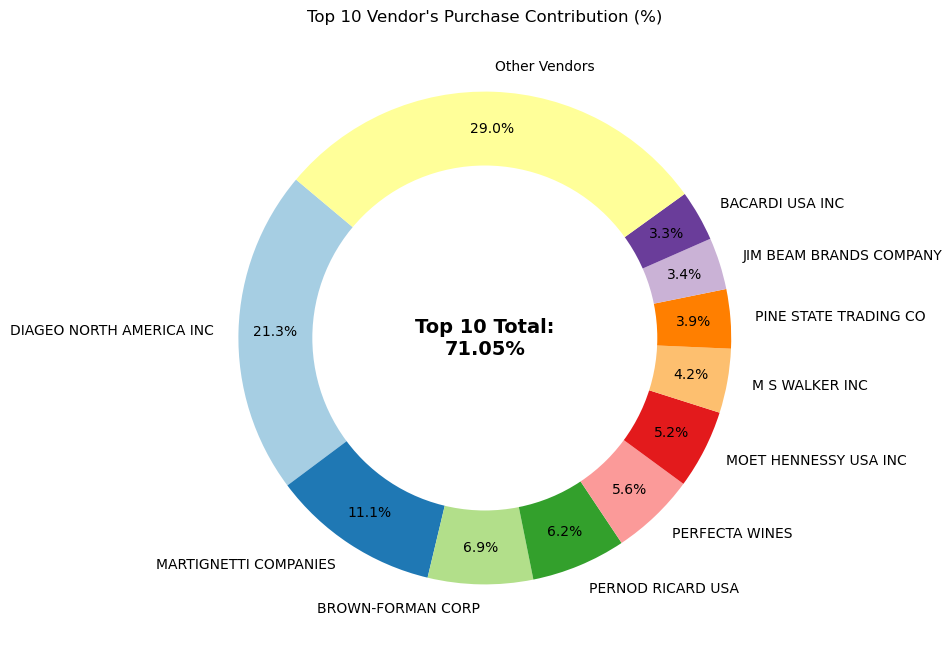

In [39]:
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['Purchase_Contribution%'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

# Append "Other Vendors" category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Donut Chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(purchase_contributions, labels=vendors, autopct='%1.1f%%',
                                  startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)

# Draw a white circle in the center to create a "donut" effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add Total Contribution annotation in the center
plt.text(0, 0, f"Top 10 Total:\n{total_contribution:.2f}%", fontsize=14, fontweight='bold', ha='center', va='center')

plt.title("Top 10 Vendor's Purchase Contribution (%)")
plt.show()


## Does Purchasing in bulk reduce the unit price, and what is the optimal purchase volume for cost saving?

In [40]:
df['UnitPurchasePrice']=df['TotalPurchaseDollars']/df['TotalPurchaseQuantity']

In [41]:
df['OrderSize']=pd.qcut(df["TotalPurchaseQuantity"],q=3,labels=["Small","Medium","Large"])

In [42]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,81.577336
Medium,22.012664
Large,14.256300


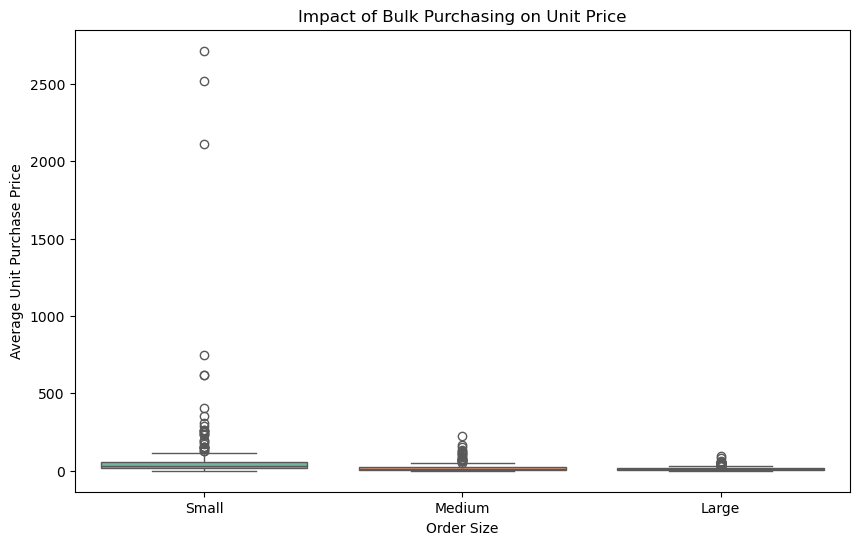

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="OrderSize", y="UnitPurchasePrice", palette="Set2")
plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()


### Impact of Bulk Purchasing on Unit Price

- **Vendors buying in bulk (Large Order Size)** get the lowest unit price (**$14.25 per unit**), meaning higher margins if they can manage inventory efficiently.  
- The **price difference between Small and Large orders** is substantial (**~67% reduction in unit cost**).  
- This suggests that **bulk pricing strategies** successfully encourage vendors to purchase in larger volumes, leading to **higher overall sales despite lower per-unit revenue**.


## Which vendors have low inventory turnover, indicating excess stock and slow moving products

In [44]:
df[df['StockTurnOver']<1].groupby('VendorName')[['StockTurnOver']].mean().sort_values('StockTurnOver',ascending=True).head(10)

,StockTurnOver
VendorName,
SURVILLE ENTERPRISES CORP,0.571429
PARK STREET IMPORTS LLC,0.626095
BANFI PRODUCTS CORP,0.627958
VRANKEN AMERICA,0.662879
Circa Wines,0.666667
DIAGEO CHATEAU ESTATE WINES,0.677195
DELICATO VINEYARDS INC,0.695321
STELLAR IMPORTING CO LLC,0.697917
E & J GALLO WINERY,0.698392


## How Much capital is locked in unsold inventory per vendor, and which vendors contribute the most to it? 

In [45]:
df['UnsoldInventoryValue']=(df['TotalPurchaseQuantity']-df['TotalSalesQuantity'])*df['PurchasePrice']
print('Total_unsold_capital:',format_dollars(df['UnsoldInventoryValue'].sum()))

Total_unsold_capital: $441.16K


In [46]:
# Aggregate Capital Locked per Vendor
inventory_value_per_vendor = df.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()

# Sort Vendors with the Highest Locked Capital
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue", ascending=False)
inventory_value_per_vendor['UnsoldInventoryValue'] = inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)


,VendorName,UnsoldInventoryValue
14,DIAGEO NORTH AMERICA INC,$104.45K
35,MARTIGNETTI COMPANIES,$67.47K
4,BROWN-FORMAN CORP,$55.24K
39,MOET HENNESSY USA INC,$27.82K
3,BANFI PRODUCTS CORP,$19.67K
45,PERNOD RICARD USA,$18.38K
44,PERFECTA WINES,$17.84K
71,ULTRA BEVERAGE COMPANY LLP,$14.44K
62,STATE WINE & SPIRITS,$12.41K
42,PALM BAY INTERNATIONAL INC,$12.38K


In [47]:
df.to_csv("inventory_value_per_vendor.csv", index=False)